In [1]:
import pandas as pd
import numpy as np
import os
from nltk import RegexpTokenizer
from nltk.corpus import stopwords

In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = os.path.join(parent_dir, 'data')
models_dir = os.path.join(parent_dir, 'models')
print('working directory: ', os.getcwd())
print('data directory:    ', data_dir, )
print('models directory:  ', models_dir)

working directory:  C:\Users\Joni\Dropbox (Privat)\CODE\InformationSystemsWS1718\notebooks
data directory:     C:\Users\Joni\Dropbox (Privat)\CODE\InformationSystemsWS1718\data
models directory:   C:\Users\Joni\Dropbox (Privat)\CODE\InformationSystemsWS1718\models


In [3]:
data = pd.read_pickle(os.path.join(data_dir, 'data_clean_4cols.pickle'))
data

,Partei_ABK,from_name,message,type
0,FDP,Valentin Abel,Gerade einmal 9.000 Anträge auf die Kaufprämie...,link
1,FDP,Valentin Abel,"""Die Liberalen stehen für einen individualisti...",link
2,FDP,Valentin Abel,Wir sind bereit für 2017 - machen wir Deutschl...,photo
3,FDP,Valentin Abel,Kann ein Jahr besser beginnen als mit einem gu...,photo
4,FDP,Valentin Abel,Platz 12 im diesjährigen #Landkreis-Ranking vo...,link
5,FDP,Valentin Abel,"In Zeiten, in denen die Welt aus den Fugen zu ...",event
6,FDP,Valentin Abel,"Fällt euch spontan etwas ein, auf das sich 83%...",link
7,FDP,Valentin Abel,"Die #AfD missbraucht Sophie #Scholl, Widerstan...",photo
8,FDP,Valentin Abel,Die #Legalisierung von #Cannabis kann nur ein ...,link
9,FDP,Valentin Abel,Bereit für 2017 – anders lässt sich die Stimmu...,photo


In [4]:
candidate_data = pd.DataFrame()
candidate_data = (data[['Partei_ABK', 'from_name']].drop_duplicates('from_name')
                                                   .set_index('from_name'))
# join all messages by the same candidate
candidate_data['messages'] = data.groupby('from_name')['message'].apply(' '.join)

In [5]:
candidate_data

,Partei_ABK,messages
from_name,,
Valentin Abel,FDP,Gerade einmal 9.000 Anträge auf die Kaufprämie...
Dr. Michael von Abercron,CDU,Elmshorn macht Putz und Michael von Abercron p...
Grigorios Aggelidis,FDP,Während wir Deutschland ins digitale Zeitalter...
Diyar Agu,DIE LINKE,"Gerade in Zeiten, in denen rechtsextreme Bürge..."
Gökay Akbulut DIE LINKE,DIE LINKE,Liebe MannheimerInnen\nnächsten Sonntag am 26....
Rolf Albach,FDP,Die Digitalisierung ändert alles. Wann ändert ...
Stephan Albani MdB,CDU,"1687 Wohnungen im Ammerland, davon 111 in Wief..."
Katrin Albsteiger,CSU,Kein Verständnis für die Äußerungen von Grünen...
Daniel Alff,SPD,Heute war Martin Schulz im Norden und hat den ...


In [6]:
n = 100
sample = candidate_data.sample(n=n)

In [7]:
tokenizer = RegexpTokenizer(r'\w+')
stopword_set = set(stopwords.words('german'))
#This function does all cleaning of data using two objects above
def nlp_clean(data):
    new_data = []
    for d in data:
        new_str = d.lower()
        dlist = tokenizer.tokenize(new_str)
        dlist = list(set(dlist).difference(stopword_set))
        new_data.append(dlist)
    return new_data

In [8]:
cleaned = nlp_clean(sample['messages'])

In [9]:
cleaned[99]

['steuerforderungen',
 'korrektheit',
 'wegen',
 'verheimlichen',
 'glyphosat',
 'interessierte',
 'kieler',
 'daraufhin',
 'ständige',
 'zeitalters',
 'weiterführende',
 'hören',
 'wenigen',
 'ermöglicht',
 'flensburger',
 '2002',
 'jahren',
 'züchten',
 'netze',
 'nazis',
 'bekannte',
 'ecke',
 'heimlich',
 'bundeswehrsoldaten',
 'rund',
 'vorlegen',
 'kannst',
 'einschänken',
 'ahoi',
 'satz',
 'fleißig',
 'sichern',
 'geschichte',
 'wikipedia',
 'alter',
 'tube',
 '54',
 'krefeld',
 'id16527716',
 'debatte',
 'alkohol',
 'gesetzgebungsverfahren',
 'massivem',
 'eigener',
 '3b2b',
 'wiese',
 'schafft',
 'großes',
 'zumuten',
 'qualifikationsstruktur',
 'lässt',
 'ok',
 'sexistische',
 'bundeskanzlerin',
 'vorgesehen',
 'utopie',
 'gefährlichen',
 'gestern',
 'bezweifle',
 'karneval',
 'straftaten',
 'stützen',
 'ruhigen',
 'tolles',
 'amtsdeutschen',
 'motivsuche',
 'endlich',
 '14873884',
 'integrieren',
 'inhaber',
 'pkw',
 'niemand',
 'wille',
 'mutmasslicher',
 'krise',
 'möchte

In [10]:
word_list = [word for words in cleaned for word in words]
vocab = list(set(word_list))

In [11]:
len(word_list)

222615

In [12]:
m = len(vocab)
m

66020

In [13]:
pd.Series(vocab)

0             gewissensfrage
1                  erstmalig
2                beleuchtung
3                      wegen
4                mitzuhelfen
5          mitgliedsbeiträge
6               lobbytreffen
7                      brome
8         bürgerfreundlicher
9          unverhältnismäßig
10                      haaa
11            zusammenfinden
12                begleichen
13                 befrieden
14             bürgerrechten
15                  genscher
16                   eningen
17            betriebsärzten
18                   lügnern
19                muslimisch
20                  gehorcht
21           geringschätzung
22                    treten
23               jugendsport
24                brauhauses
25           stadtteilfestes
26            dämmerschoppen
27            verpflichteten
28                     kosma
29       parlamentsausschuss
                ...         
65990           printprodukt
65991              ausbeulen
65992                   pass
65993         

In [14]:
target_word = 'merkel'
vocab.index(target_word)

51263

In [15]:
t = np.zeros(len(vocab))
t[vocab.index(target_word)] = 1

In [59]:
from random import randint
i = randint(0, n-1)
d = np.array(np.zeros(n), ndmin=2).T
d[i] = 1
d

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      

def get_window(i, window_size=8):
    words = cleaned[i]
    middle = randint(window_size, len(words) - window_size - 1)
    index = np.zeros[len(words)]
    for c in range(middle - window_size, middle + window_size):
        if not c = middle:
            index[c] = 1
    return index

In [61]:
# use this instead of get_window()
window_size=8
words = cleaned[i]
middle = randint(window_size, len(words) - window_size - 1)
window_words = [words[j] for j in range(middle - window_size, middle + window_size)]
window_words

['work4you',
 'ergebnissen',
 'versicherten',
 'leverkusen',
 'html',
 'diskutiert',
 'zählt',
 'erreichen',
 'zukunft',
 'absage',
 'wirkungslos',
 'food',
 'zahlen',
 'ehrenamtlich',
 'juni',
 'fragen']

In [62]:
t = np.array(np.zeros(len(vocab)), ndmin=2).T
for w in window_words:
    t[vocab.index(w)] = 1
t

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

In [63]:
# p = dimensions of document vectors (no. of features)
p = 100
D = np.random.rand(p, n)
D.shape

(100, 100)

In [64]:
U = np.random.rand(m, p)
U.shape

(66020, 100)

In [43]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)  # axis=1 for row-vector, axis=0 for column-vector

In [66]:
d_hat = np.array(np.dot(D, d), ndmin=2)
l = np.array(np.dot(U, d_hat), ndmin=2)
t_hat = softmax(l)

In [67]:
d_hat#.T.shape

array([[ 0.21459334],
       [ 0.01064989],
       [ 0.70780963],
       [ 0.49927495],
       [ 0.76793635],
       [ 0.67890436],
       [ 0.16511815],
       [ 0.84566479],
       [ 0.52472768],
       [ 0.08723913],
       [ 0.79920705],
       [ 0.90968642],
       [ 0.77114128],
       [ 0.68637711],
       [ 0.61053378],
       [ 0.66903021],
       [ 0.78082805],
       [ 0.49161927],
       [ 0.62088762],
       [ 0.97860443],
       [ 0.24503069],
       [ 0.63502717],
       [ 0.65780896],
       [ 0.79092157],
       [ 0.06643863],
       [ 0.80203162],
       [ 0.52934039],
       [ 0.44312563],
       [ 0.22648122],
       [ 0.70076595],
       [ 0.96248712],
       [ 0.22241685],
       [ 0.12022051],
       [ 0.87585825],
       [ 0.31703528],
       [ 0.32976187],
       [ 0.18087943],
       [ 0.25743856],
       [ 0.0611892 ],
       [ 0.40599188],
       [ 0.1464249 ],
       [ 0.70974493],
       [ 0.51040114],
       [ 0.04874856],
       [ 0.76708613],
       [ 0

In [68]:
l

array([[ 22.79307641],
       [ 23.38755574],
       [ 22.96597724],
       ..., 
       [ 23.30078552],
       [ 23.73473034],
       [ 26.33803428]])

In [69]:
t_hat

array([[  9.01401166e-07],
       [  1.63341751e-06],
       [  1.07153902e-06],
       ..., 
       [  1.49766052e-06],
       [  2.31138996e-06],
       [  3.12229373e-05]])

In [70]:
np.sum(t_hat)

1.0

In [51]:
def cross_entropy_loss(t, t_hat):
    return - np.dot(t.T, np.log(t_hat))

In [71]:
cross_entropy_loss(t, t_hat)

array([[ 196.02705139]])

In [72]:
errors_out = t_hat - t
#EI = np.dot(t.T, errors)
#EI
errors_out#.shape

array([[  9.01401166e-07],
       [  1.63341751e-06],
       [  1.07153902e-06],
       ..., 
       [  1.49766052e-06],
       [  2.31138996e-06],
       [  3.12229373e-05]])

In [56]:
alpha = 0.025

In [73]:
errors_middle = np.dot(U.T, errors_out)

In [74]:
D += - alpha * np.dot(errors_middle, d.T)

In [75]:
U += - alpha * np.dot(errors_out, d_hat.T)

In [ ]:
window_size=8
alpha = 0.025
p = 100  # p = dimensions of document vectors (no. of features)
m = len(vocab)

D = np.random.rand(p, n)
U = np.random.rand(m, p)

In [101]:
epochs = 20
for e in range(epochs):
    for i in range(n):
        d = np.array(np.zeros(n), ndmin=2).T
        d[i] = 1
        #window_size=8
        words = cleaned[i]
        middle = randint(window_size, len(words) - window_size - 1)
        window_words = [words[j] for j in range(middle - window_size, middle + window_size)]

        t = np.array(np.zeros(len(vocab)), ndmin=2).T
        for w in window_words:
            t[vocab.index(w)] = 1

        d_hat = np.array(np.dot(D, d), ndmin=2)
        l = np.array(np.dot(U, d_hat), ndmin=2)
        t_hat = softmax(l)
        if i == 99:
            print(cross_entropy_loss(t, t_hat))

        errors_out = t_hat - t
        errors_middle = np.dot(U.T, errors_out)
        D += - alpha * np.dot(errors_middle, d.T)
        U += - alpha * np.dot(errors_out, d_hat.T)
    

[[ 248.76918215]]
[[ 262.89930233]]
[[ 328.86586788]]
[[ 444.68035917]]
[[ 538.41268506]]
[[ 555.75120367]]
[[ 844.87364316]]
[[ 1125.33853471]]
[[ 1395.63864952]]
[[ 1875.80304482]]
[[ 1858.69546549]]
[[ 2060.94268993]]
[[ 2647.52876208]]
[[ 3393.24617086]]
[[ 3597.18348219]]
[[ 3398.23191889]]
[[ 4563.97905042]]


C:\Users\Joni\Anaconda3\envs\infosys\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Joni\Anaconda3\envs\infosys\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


[[ nan]]
[[ nan]]
[[ nan]]


In [79]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2)

In [93]:
party_colors = {'AfD': 'xkcd:blue',
                'DIE LINKE': 'xkcd:magenta',
                'GRÜNE': 'xkcd:grass green',
                'CSU': 'xkcd:sky blue',
                'CDU': 'xkcd:black',
                'FDP': 'xkcd:goldenrod',
                'SPD': 'xkcd:red'}
sample['color'] = sample['Partei_ABK'].map(party_colors)

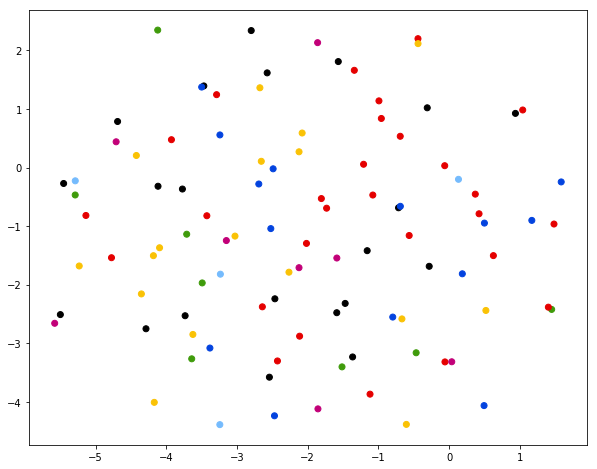

In [95]:
D_tsne = tsne.fit_transform(D)
plt.figure(num=None, figsize=(10, 8))  # set the figure size
plt.scatter(D_tsne[:, 0], D_tsne[:, 1], c=sample['color'])
plt.show()

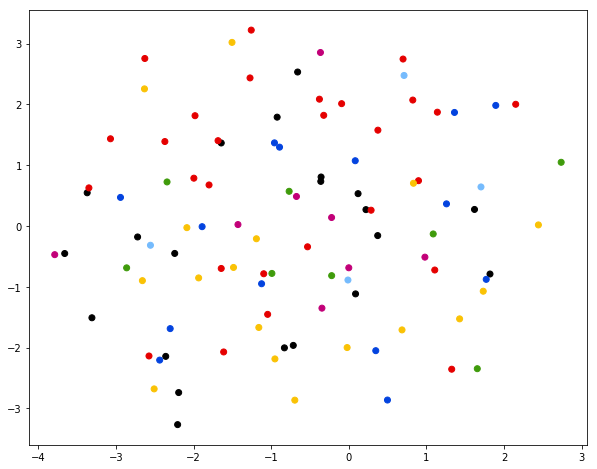

In [98]:
D_tsne = tsne.fit_transform(D)
plt.figure(num=None, figsize=(10, 8))  # set the figure size
plt.scatter(D_tsne[:, 0], D_tsne[:, 1], c=sample['color'])
plt.show()

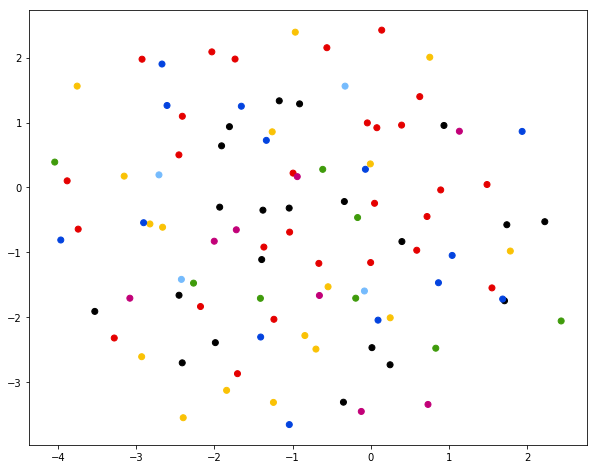

In [100]:
D_tsne = tsne.fit_transform(D)
plt.figure(num=None, figsize=(10, 8))  # set the figure size
plt.scatter(D_tsne[:, 0], D_tsne[:, 1], c=sample['color'])
plt.show()

In [102]:
D_tsne = tsne.fit_transform(D)
plt.figure(num=None, figsize=(10, 8))  # set the figure size
plt.scatter(D_tsne[:, 0], D_tsne[:, 1], c=sample['color'])
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [122]:
100 * (100 - 5) // 100

95